In [7]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('regression_generated.csv')
print(data)

           label  features_1  features_2  features_3  features_4  features_5  \
0     -89.243497    2.175170   -0.285786   -0.603396   -0.627453   -0.686474   
1     230.050125    1.481941   -1.327870   -0.543583   -0.303578    1.552964   
2    -286.844411   -1.154394   -0.178649   -1.636646    0.239353   -0.684994   
3     364.552862    0.197665    1.455707    1.562205    2.168207    0.053335   
4     515.460006    0.596676    0.969860    1.294158   -0.404728    2.145297   
...          ...         ...         ...         ...         ...         ...   
1995 -328.100239   -1.820929    1.358539   -2.494838    0.828299    0.199255   
1996  -62.960036   -0.883712   -0.063687   -0.418704   -0.872601    0.363769   
1997  -90.262252   -0.021394   -0.312864   -0.730848   -1.341482   -0.720862   
1998  -74.333901   -0.041909   -0.862731   -1.232011    1.268843    0.093043   
1999    8.321454   -1.056364    0.259247    0.307835    1.094903    0.472395   

      features_6  features_7  features_

Correlation 'features_1' and 'features_2': -0.005219711383220027
Correlation 'features_1' and 'features_3': 0.02369042507320443
Correlation 'features_2' and 'features_2': 0.04735993943504082


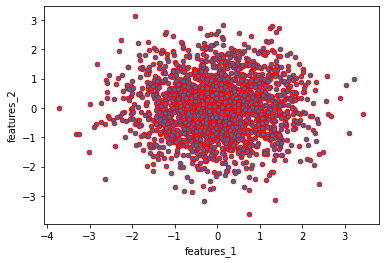

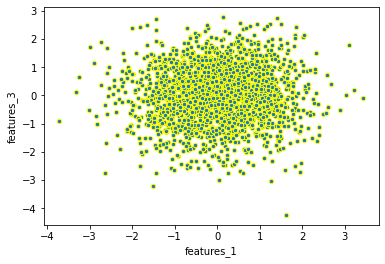

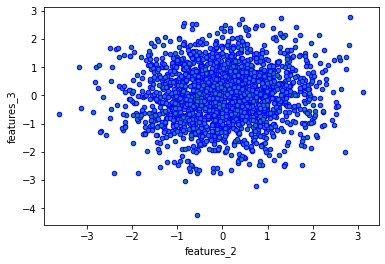

In [63]:
features_1 = data.features_1.values.tolist()
features_2 = data.features_2.values.tolist()
data.plot.scatter(x = "features_1", y = "features_2", edgecolors='red')
data.plot.scatter(x = "features_1", y = "features_3",edgecolors='yellow')
data.plot.scatter(x = "features_2", y = "features_3", edgecolors='blue')

print("Correlation 'features_1' and 'features_2':", data["features_1"].corr(data["features_2"]))
print("Correlation 'features_1' and 'features_3':", data["features_1"].corr(data["features_3"]))
print("Correlation 'features_2' and 'features_2':", data["features_2"].corr(data["features_3"]))

#The correlation between features 1 and features 3 is negative meaning that the relationship between two variables is such that as the value of one variable increases, the other decreases

First set mean  [-3  3]
First set standard deviation  1
Second set mean  [-2  0]
Second set standard deviation  2


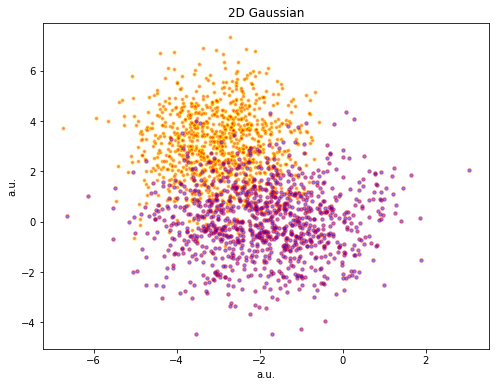

In [66]:
from matplotlib.ticker import FuncFormatter, AutoMinorLocator
mean1 = np.zeros(4)
mean2 = np.zeros(4)
cov1 = np.zeros((4,4)) 
cov2 = np.zeros((4,4))
def gener_2d():
    a = np.random.randint(-5,6,size=2)   #first set of 2D data
    b = np.random.randint(-5,6,size=2)   #second set of 2D data
    if b.all() == a.all():
        while(b.all() == a.all()):
            b = np.random.randint(-5,6,size=2)
    
    c = np.random.randint(1,5)
    d = np.random.randint(1,5)
    if d == c:
        while(d == c):
            d = np.random.randint(1,5)
    
    global mean1, cov1, mean2, cov2
    mean1 = a
    cov1 = np.array([[c,0], [0,d]])

    mean2 = b
    cov2 = np.array([[d,0], [0,d]])

    d1 = np.random.multivariate_normal(mean1, cov1, size=1000)
    d2 = np.random.multivariate_normal(mean2, cov2, size=1000)
    
    sets = np.array([d1, d2])
    
    return sets

datasets = gener_2d()

print("First set mean ", mean1)
print("First set standard deviation ", cov1[(0,0)])
print("Second set mean ", mean2)
print("Second set standard deviation ", cov2[(0,0)])

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(datasets[0][:,0], datasets[0][:,1], s=12, c = "red", alpha=0.5, label="Set 1",  edgecolors = "yellow")
ax.scatter(datasets[1][:,0], datasets[1][:,1], s=12, c = "blue", alpha=0.5, label="Set 2",  edgecolors = "red")

ax.set_title("2D Gaussian")
ax.set_xlabel("a.u.")
ax.set_ylabel("a.u.")


"""
ax.set_xlim(min(mean1[0]-2*cov1[(0,0)]-int(np.round(3/cov1[(0,0)])), mean2[0]-2*cov2[(0,0)]-int(np.round(3/cov1[(0,0)]))), max(mean1[0]+2*cov1[(0,0)]+int(np.round(3/cov1[(0,0)])), mean2[0]+2*cov2[(0,0)]+int(np.round(3/cov1[(0,0)]))))
ax.set_ylim(min(mean1[1]-2*cov1[(1,1)]-int(np.round(3/cov1[(1,1)])), mean2[1]-2*cov2[(1,1)]-int(np.round(3/cov1[(1,1)]))), max(mean1[1]+2*cov1[(1,1)]+int(np.round(3/cov1[(1,1)])), mean2[1]+2*cov2[(1,1)]+int(np.round(3/cov1[(0,0)]))))
ax.xaxis.set_major_formatter(FuncFormatter(intonly))
ax.yaxis.set_major_formatter(FuncFormatter(intonly))
"""

plt.show()

X array:
[ 0.83333333  2.5         4.16666667  5.83333333  7.5         9.16666667
 10.83333333 12.5        14.16666667 15.83333333 17.5        19.16666667
 20.83333333 22.5        24.16666667]

Y array:
[-0.19121409 -0.16524649 -0.136472   -0.12858998 -0.08225938 -0.0986224
 -0.06823558 -0.09576672 -0.13752665 -0.12755093 -0.16117397 -0.08168838
  0.0445752   0.09428571  0.36047619]

Y errors array:
[0.4650168  0.40956283 0.40609345 0.42818694 0.43703932 0.41852454
 0.45196948 0.49425753 0.45733719 0.45586764 0.41596622 0.3922764
 0.46746555 0.09293403 1.18338526]



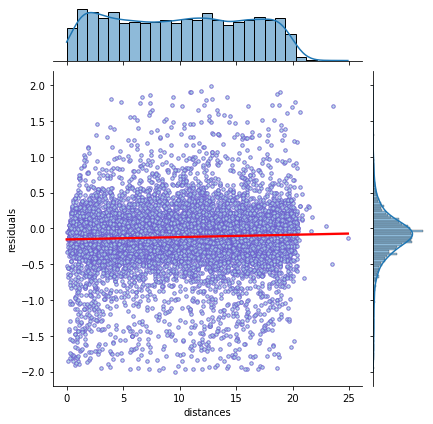

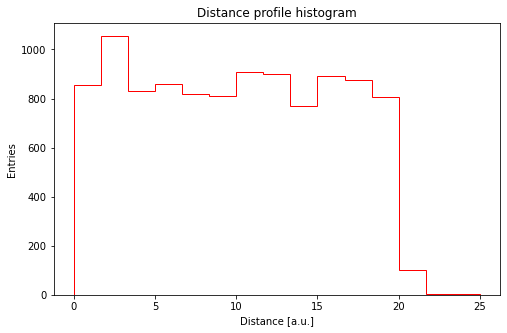

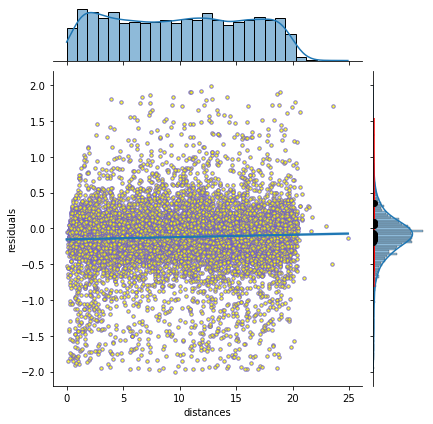

In [65]:
import pickle

filename = "residuals_261.pkl"
infile = open(filename, "rb")
tdict = pickle.load(infile).item()
infile.close()

df = pd.DataFrame(tdict)
df = df[abs(df.loc[:, "residuals"]) < 2]

sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"LightBlue", "edgecolors":"SlateBlue", "s":12}, "line_kws":{"color":"r"}})

fig = plt.figure(figsize=(8, 5)) # create the figure and the axes
plt.hist(df["distances"], range=(0, 25), bins=15, histtype="step", color="red")
ax = fig.axes[0]
ax.set_title("Distance profile histogram")
ax.set_xlabel("Distance [a.u.]")
ax.set_ylabel("Entries")

aux = np.linspace(0, 25, 16)
x = np.array((aux[0:15]+aux[1:16])/2)

dux = np.digitize(df["distances"], aux)
y = np.zeros(15)
erry = np.zeros(15)
for i in range(15):
    y[i] += [df["residuals"][dux == i+1].mean(),]
    erry[i] += [df["residuals"][dux == i+1].std(),]

print("X array:")
print(str(x) + "\n")
print("Y array:")
print(str(y) + "\n")
print("Y errors:")
print(str(erry) + "\n")

sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"Yellow", "edgecolors":"SlateBlue", "s":12}})
plt.errorbar(x=x, y=y, yerr=erry, ecolor="r", fmt="ko")

plt.show()

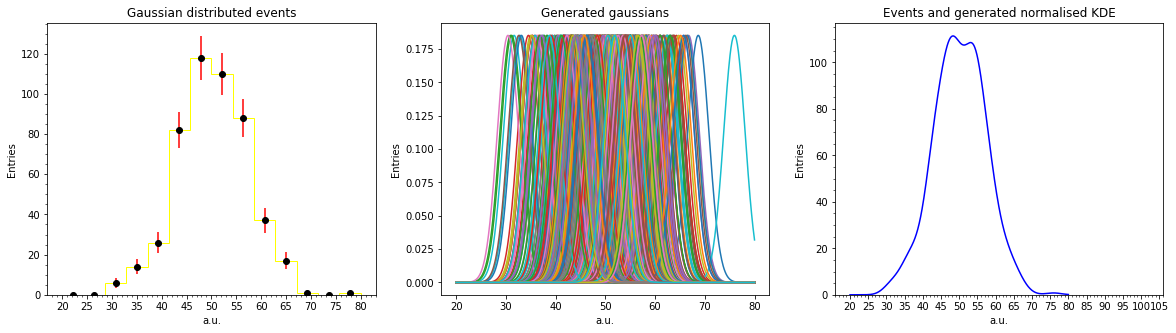

In [67]:
from scipy.stats import norm
from scipy.integrate import trapz

mu = 50
sigma = 7 
nev = 500

x = np.random.normal(mu, sigma, nev)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
entries, edges, _ = ax1.hist(x, range=(20, 80), bins=14, histtype="step", color="yellow")
ax1.set_title("Gaussian distributed events")
ax1.set_xlabel("a.u.")
ax1.set_ylabel("Entries")

def intonly(x, pos):
    if (x % 1) != 0:
        return ""
    return int(x)

ax1.xaxis.set_major_locator(plt.MultipleLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_major_locator(plt.MultipleLocator(20))
ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_major_formatter(FuncFormatter(intonly))

binctr = np.array((edges[1:]+edges[:-1])/2)
ax1.errorbar(binctr, entries, yerr=np.sqrt(entries), fmt="ko", ecolor="r")

xax = np.linspace(np.amin(edges), np.amax(edges), (int(np.ceil(np.amax(edges)))-int(np.floor(np.amin(edges)))+1)*10)

stddev = 1.06*x.std()*(x.size**(-1/5))

gauss = np.zeros((len(x),len(xax)))
for count,ev in enumerate(x):
    xgaus = norm.pdf(xax, ev, scale=stddev)
    ax2.plot(xax, xgaus)
    gauss[count,:]= xgaus

ax2.set_title("Generated gaussians")
ax2.set_xlabel("a.u.")
ax2.set_ylabel("Entries")

pdf = np.sum(gauss, axis=0)
norm = trapz(pdf,xax)/(nev*(int(np.ceil(np.amax(edges)))-int(np.floor(np.amin(edges))))/(len(edges)-1))
npdf = pdf/norm

ax3.hist(x, range=(80, 102), bins=14, histtype="step", color="blue")
ax3.plot(xax, npdf, color="blue")

ax3.set_title("Events and generated normalised KDE")
ax3.set_xlabel("a.u.")
ax3.set_ylabel("Entries")

ax3.xaxis.set_major_locator(plt.MultipleLocator(5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
ax3.yaxis.set_major_locator(plt.MultipleLocator(20))
ax3.yaxis.set_minor_locator(AutoMinorLocator(4))
ax3.yaxis.set_major_formatter(FuncFormatter(intonly))

plt.show()